<a href="https://colab.research.google.com/github/hismafathimaj-max/codealpha_tasks/blob/main/Task2_Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unemployment Analysis with Python**

This project analyzes unemployment rate data in India using Python. The aim is to explore, visualize, and identify patterns, including the impact of Covid-19.

In [5]:
# Step 1: Upload the CSV file from your system
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [6]:
# Step 2: Import pandas and read the uploaded CSV file
import pandas as pd

df = pd.read_csv("Unemployment in India.csv")

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:

print(df.columns)


df.info()

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [12]:
print(df.columns)
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
print(df.columns)
df["Date"] = pd.to_datetime(df["Date"])
df.columns = [col.strip().replace(" ", "_") for col in df.columns]


df["Date"] = pd.to_datetime(df["Date"])


df.head()

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')


/tmp/ipython-input-12-4170298116.py:4: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


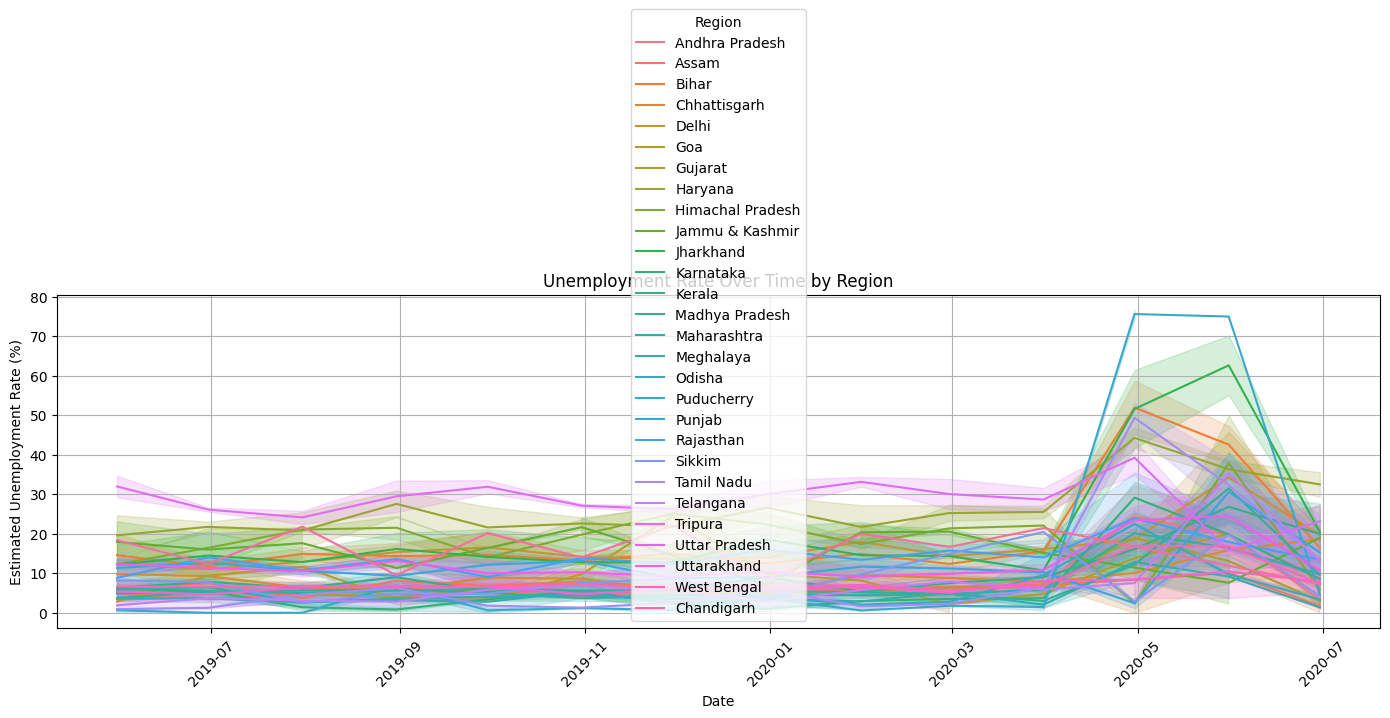

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Date", y="Estimated_Unemployment_Rate_(%)", hue="Region")
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

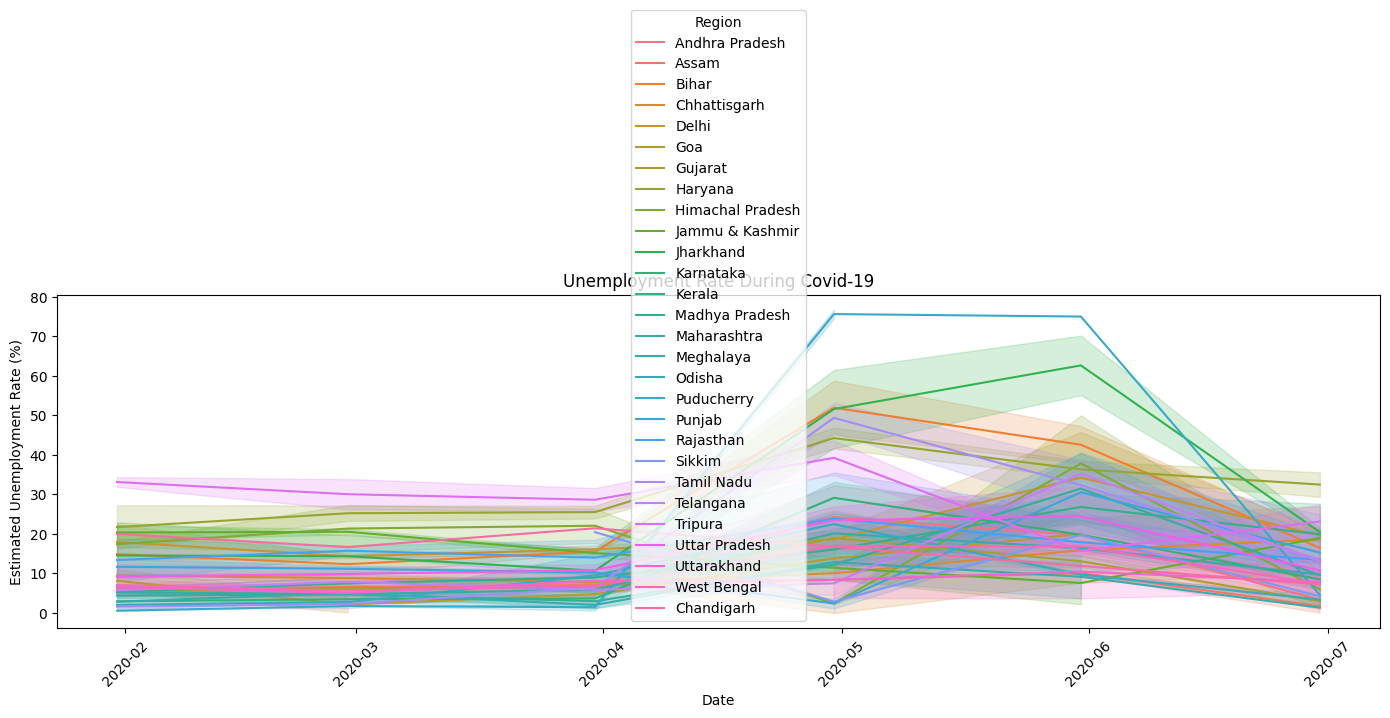

In [14]:
# Filter data from Jan 2020 to see Covid-19 impact
covid_df = df[df["Date"] >= "2020-01-01"]

# Line plot for Covid-19 period
plt.figure(figsize=(14, 6))
sns.lineplot(data=covid_df, x="Date", y="Estimated_Unemployment_Rate_(%)", hue="Region")
plt.title("Unemployment Rate During Covid-19")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

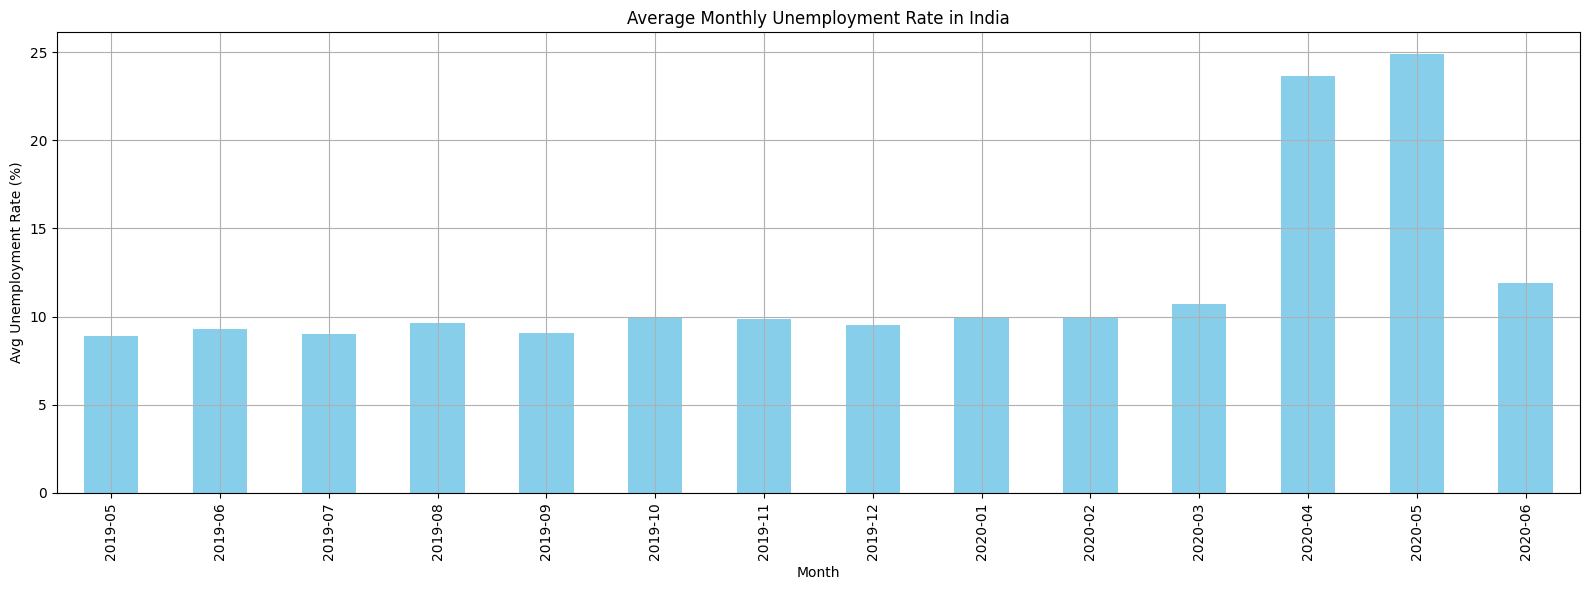

In [15]:
monthly_avg = df.groupby(df["Date"].dt.to_period("M"))["Estimated_Unemployment_Rate_(%)"].mean()

monthly_avg.plot(kind="bar", figsize=(16, 6), color="skyblue")
plt.title("Average Monthly Unemployment Rate in India")
plt.xlabel("Month")
plt.ylabel("Avg Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

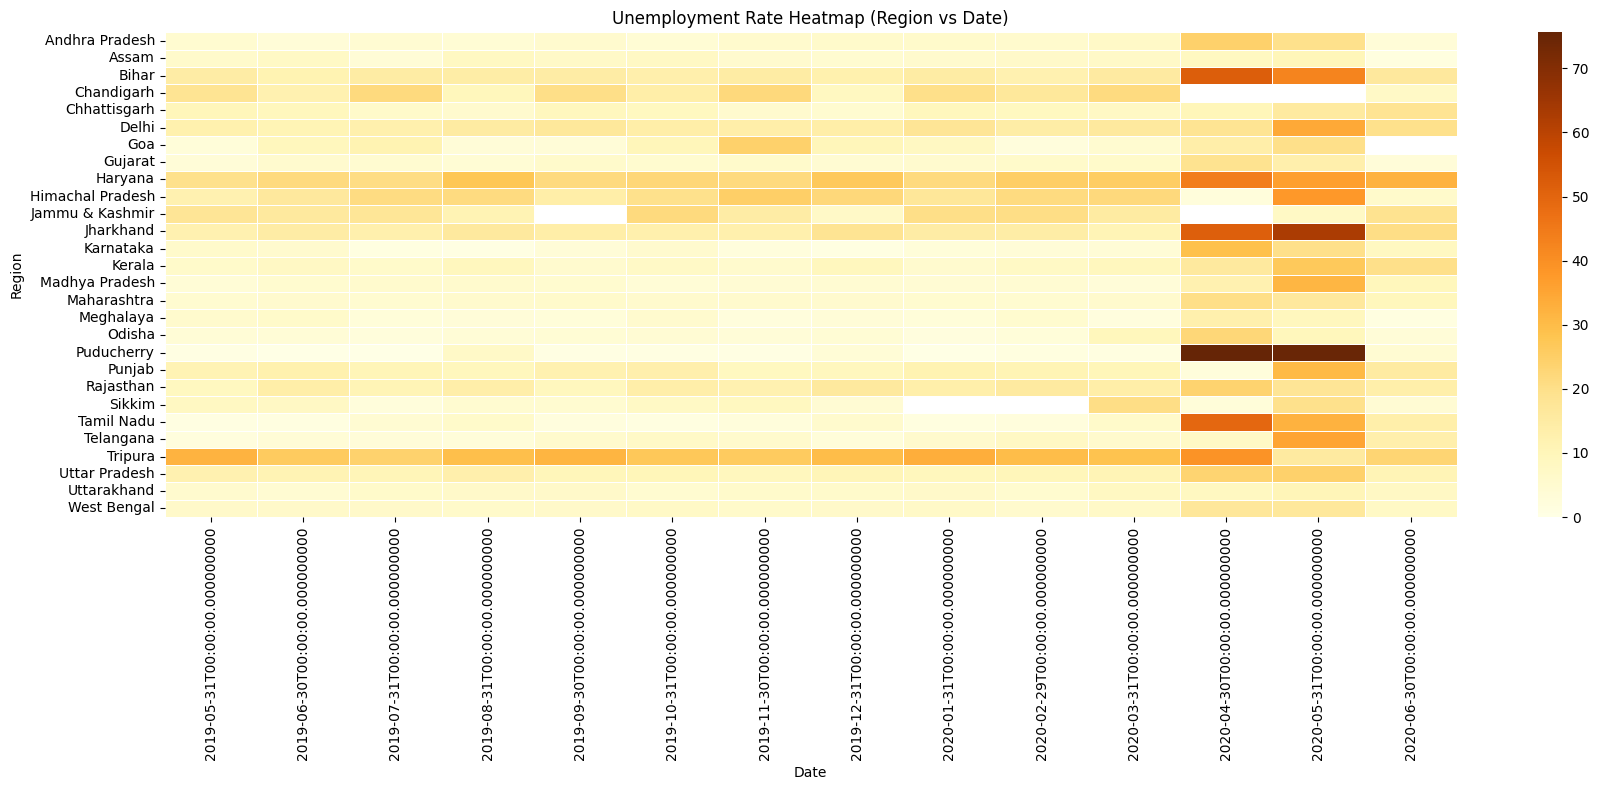

In [16]:
heatmap_data = df.pivot_table(values="Estimated_Unemployment_Rate_(%)", index="Region", columns="Date")

plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_data, cmap="YlOrBr", linewidths=0.5)
plt.title("Unemployment Rate Heatmap (Region vs Date)")
plt.xlabel("Date")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

## 📌 Conclusion

-  The unemployment rate in India spiked significantly during the early months of 2020, clearly showing the economic impact of the Covid-19 pandemic.
-  States like *Delhi, Haryana, and Rajasthan* showed more fluctuation in unemployment compared to others.
-  Some *seasonal patterns* were observed, likely due to agriculture cycles in rural states.
-  These insights can be valuable for *government policy-making* and targeted job support programs.

 This project used *Pandas, **Seaborn, and **Matplotlib* for data cleaning, analysis, and visualization.